# IMPORT LIBARARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
%matplotlib inline

%matplotlib inline turns on “inline plotting”, where plot graphics will appear in your notebook. This has important implications for interactivity: for inline plotting, commands in cells below the cell that outputs a plot will not affect the plot. For example, changing the color map is not possible from cells below the cell that creates a plot. However, for other backends, such as qt4, that open a separate window, cells below those that create the plot will change the plot - it is a live object in memory. If you are not using matplotlib in interactive mode at all, figures will only appear if you invoke

In [2]:
house_price= pd.read_csv("kc_house_data.csv")

In [3]:
house_price

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [4]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
house_price.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
house_price.describe(include='all')

id             date         price      bedrooms  \
count   2.161300e+04            21613  2.161300e+04  21613.000000   
unique           NaN              372           NaN           NaN   
top              NaN  20140623T000000           NaN           NaN   
freq             NaN              142           NaN           NaN   
mean    4.580302e+09              NaN  5.400881e+05      3.370842   
std     2.876566e+09              NaN  3.671272e+05      0.930062   
min     1.000102e+06              NaN  7.500000e+04      0.000000   
25%     2.123049e+09              NaN  3.219500e+05      3.000000   
50%     3.904930e+09              NaN  4.500000e+05      3.000000   
75%     7.308900e+09              NaN  6.450000e+05      4.000000   
max     9.900000e+09              NaN  7.700000e+06     33.000000   

           bathrooms   sqft_living      sqft_lot        floors    waterfront  \
count   21613.000000  21613.000000  2.161300e+04  21613.000000  21613.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        2.114757   2079.899736  1.510697e+04      1.494309      0.007542   
std         0.770163    918.440897  4.142051e+04      0.539989      0.086517   
min         0.000000    290.000000  5.200000e+02      1.000000      0.000000   
25%         1.750000   1427.000000  5.040000e+03      1.000000      0.000000   
50%         2.250000   1910.000000  7.618000e+03      1.500000      0.000000   
75%         2.500000   2550.000000  1.068800e+04      2.000000      0.000000   
max         8.000000  13540.000000  1.651359e+06      3.500000      1.000000   

                view  ...         grade    sqft_above  sqft_basement  \
count   21613.000000  ...  21613.000000  21613.000000   21613.000000   
unique           NaN  ...           NaN           NaN            NaN   
top              NaN  ...           NaN           NaN            NaN   
freq             NaN  ...           NaN           NaN            NaN   
mean        0.234303  ...      7.656873   1788.390691     291.509045   
std         0.766318  ...      1.175459    828.090978     442.575043   
min         0.000000  ...      1.000000    290.000000       0.000000   
25%         0.000000  ...      7.000000   1190.000000       0.000000   
50%         0.000000  ...      7.000000   1560.000000       0.000000   
75%         0.000000  ...      8.000000   2210.000000     560.000000   
max         4.000000  ...     13.000000   9410.000000    4820.000000   

            yr_built  yr_renovated       zipcode           lat          long  \
count   21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean     1971.005136     84.402258  98077.939805     47.560053   -122.213896   
std        29.373411    401.679240     53.505026      0.138564      0.140828   
min      1900.000000      0.000000  98001.000000     47.155900   -122.519000   
25%      1951.000000      0.000000  98033.000000     47.471000   -122.328000   
50%      1975.000000      0.000000  98065.000000     47.571800   -122.230000   
75%      1997.000000      0.000000  98118.000000     47.678000   -122.125000   
max      2015.000000   2015.000000  98199.000000     47.777600   -121.315000   

        sqft_living15     sqft_lot15  
count    21613.000000   21613.000000  
unique            NaN            NaN  
top               NaN            NaN  
freq              NaN            NaN  
mean      1986.552492   12768.455652  
std        685.391304   27304.179631  
min        399.000000     651.000000  
25%       1490.000000    5100.000000  
50%       1840.000000    7620.000000  
75%       23

In [7]:
house_price.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [8]:
house_price.isnull()

id   date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      False  False  False     False      False        False     False   
1      False  False  False     False      False        False     False   
2      False  False  False     False      False        False     False   
3      False  False  False     False      False        False     False   
4      False  False  False     False      False        False     False   
...      ...    ...    ...       ...        ...          ...       ...   
21608  False  False  False     False      False        False     False   
21609  False  False  False     False      False        False     False   
21610  False  False  False     False      False        False     False   
21611  False  False  False     False      False        False     False   
21612  False  False  False     False      False        False     False   

       floors  waterfront   view  ...  grade  sqft_above  sqft_basement  \
0       False       False  False  ...  False       False          False   
1       False       False  False  ...  False       False          False   
2       False       False  False  ...  False       False          False   
3       False       False  False  ...  False       False          False   
4       False       False  False  ...  False       False          False   
...       ...         ...    ...  ...    ...         ...            ...   
21608   False       False  False  ...  False       False          False   
21609   False       False  False  ...  False       False          False   
21610   False       False  False  ...  False       False          False   
21611   False       False  False  ...  False       False          False   
21612   False       False  False  ...  False       False          False   

       yr_built  yr_renovated  zipcode    lat   long  sqft_living15  \
0         False         False    False  False  False          False   
1         False         False    False  False  False          False   
2         False         False    False  False  False          False   
3         False         False    False  False  False          False   
4         False         False    False  False  False          False   
...         ...           ...      ...    ...    ...            ...   
21608     False         False    False  False  False          False   
21609     False         False    False  False  False          False   
21610     False         False    False  False  False          False   
21611     False         False    False  False  False          False   
21612     False         False    False  False  False          False   

       sqft_lot15  
0           False  
1           False  
2           False  
3           False  
4           False  
...           ...  
21608       False  
21609       False  
21610       False  
21611       False  
21612       False  

[21613 rows x 21 columns]

In [9]:
house_price.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Now the data looks good and there are no missing values. Also, the first cloumn is just 'id', 'date', so we don' need those columns. Let's drop it from data and make it more clean.

In [10]:
house_price[["id","date"]]

id             date
0      7129300520  20141013T000000
1      6414100192  20141209T000000
2      5631500400  20150225T000000
3      2487200875  20141209T000000
4      1954400510  20150218T000000
...           ...              ...
21608   263000018  20140521T000000
21609  6600060120  20150223T000000
21610  1523300141  20140623T000000
21611   291310100  20150116T000000
21612  1523300157  20141015T000000

[21613 rows x 2 columns]

<AxesSubplot:>

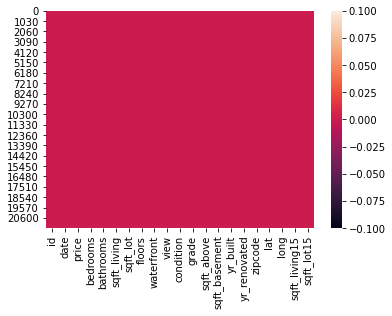

In [11]:
sns.heatmap(house_price.isnull())

<AxesSubplot:>

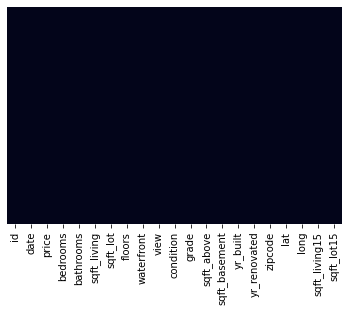

In [12]:
sns.heatmap(house_price.isnull(),yticklabels=False, cbar=False)

In [13]:
clear_data= house_price.drop(columns=["id","date",'waterfront',"view",'condition','grade','yr_built','yr_renovated','sqft_lot','sqft_above',"sqft_basement",'sqft_living15',"lat",'sqft_lot15'])

In [14]:
# house_price.drop(columns=["id","date"]), to clear unwanted column use function as drop.

In [15]:
clear_data

price  bedrooms  bathrooms  sqft_living  floors  zipcode     long
0      221900.0         3       1.00         1180     1.0    98178 -122.257
1      538000.0         3       2.25         2570     2.0    98125 -122.319
2      180000.0         2       1.00          770     1.0    98028 -122.233
3      604000.0         4       3.00         1960     1.0    98136 -122.393
4      510000.0         3       2.00         1680     1.0    98074 -122.045
...         ...       ...        ...          ...     ...      ...      ...
21608  360000.0         3       2.50         1530     3.0    98103 -122.346
21609  400000.0         4       2.50         2310     2.0    98146 -122.362
21610  402101.0         2       0.75         1020     2.0    98144 -122.299
21611  400000.0         3       2.50         1600     2.0    98027 -122.069
21612  325000.0         2       0.75         1020     2.0    98144 -122.299

[21613 rows x 7 columns]

In [16]:
clear_data.loc[1:2]

price  bedrooms  bathrooms  sqft_living  floors  zipcode     long
1  538000.0         3       2.25         2570     2.0    98125 -122.319
2  180000.0         2       1.00          770     1.0    98028 -122.233

In [17]:
clear_data.shape

(21613, 7)

In [18]:
clear_data['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [19]:
clear_data[['price']].value_counts()

price    
450000.0     172
350000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
459990.0       1
459995.0       1
460458.0       1
460940.0       1
7700000.0      1
Length: 4028, dtype: int64

In [20]:
clear_data.head()

price  bedrooms  bathrooms  sqft_living  floors  zipcode     long
0  221900.0         3       1.00         1180     1.0    98178 -122.257
1  538000.0         3       2.25         2570     2.0    98125 -122.319
2  180000.0         2       1.00          770     1.0    98028 -122.233
3  604000.0         4       3.00         1960     1.0    98136 -122.393
4  510000.0         3       2.00         1680     1.0    98074 -122.045

In [21]:
clear_data.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
floors         0
zipcode        0
long           0
dtype: int64

In [22]:
#clear_data.dropna(inplace=true), means clear the null value

In [23]:
clear_data.shape


(21613, 7)

In [24]:
clear_data["bedrooms"].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

In [25]:
clear_data[clear_data.bedrooms>33]

Empty DataFrame
Columns: [price, bedrooms, bathrooms, sqft_living, floors, zipcode, long]
Index: []

In [26]:
clear_data.sqft_living.unique()

array([1180, 2570,  770, ..., 3087, 3118, 1425], dtype=int64)

In [27]:
!pip install pandas_profiling

In [28]:
from pandas_profiling import ProfileReport


In [29]:
profile=ProfileReport(clear_data)

In [30]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

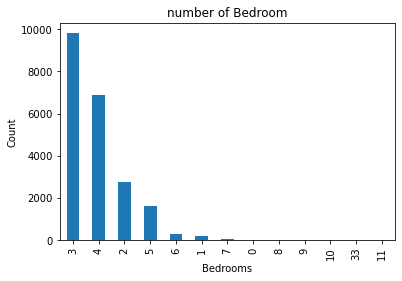

In [31]:
clear_data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

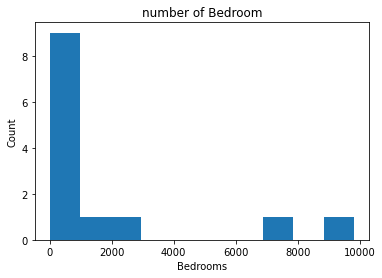

In [32]:
clear_data['bedrooms'].value_counts().plot(kind='hist')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

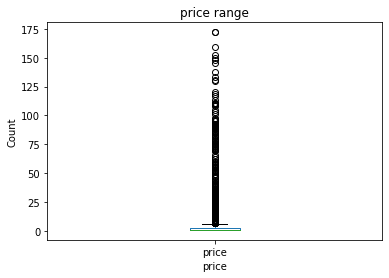

In [34]:
clear_data['price'].value_counts().plot(kind='box')
plt.title('price range')
plt.xlabel('price')
plt.ylabel('Count')
sns.despine

In [37]:
clear_data[["price"]]

price
0      221900.0
1      538000.0
2      180000.0
3      604000.0
4      510000.0
...         ...
21608  360000.0
21609  400000.0
21610  402101.0
21611  400000.0
21612  325000.0

[21613 rows x 1 columns]

In [38]:
clear_data["price"].unique()

array([ 221900.,  538000.,  180000., ...,  610685., 1007500.,  402101.])

In [40]:
clear_data[clear_data.price>330000]

price  bedrooms  bathrooms  sqft_living  floors  zipcode     long
1       538000.0         3       2.25         2570     2.0    98125 -122.319
3       604000.0         4       3.00         1960     1.0    98136 -122.393
4       510000.0         3       2.00         1680     1.0    98074 -122.045
5      1225000.0         4       4.50         5420     1.0    98053 -122.005
10      662500.0         3       2.50         3560     1.0    98007 -122.145
...          ...       ...        ...          ...     ...      ...      ...
21607   475000.0         3       2.50         1310     2.0    98116 -122.409
21608   360000.0         3       2.50         1530     3.0    98103 -122.346
21609   400000.0         4       2.50         2310     2.0    98146 -122.362
21610   402101.0         2       0.75         1020     2.0    98144 -122.299
21611   400000.0         3       2.50         1600     2.0    98027 -122.069

[15732 rows x 7 columns]

C:\Users\sony\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
<ipython-input-43-a354f7ad0abf>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


TypeError: 'module' object is not callable

<Figure size 720x720 with 0 Axes>

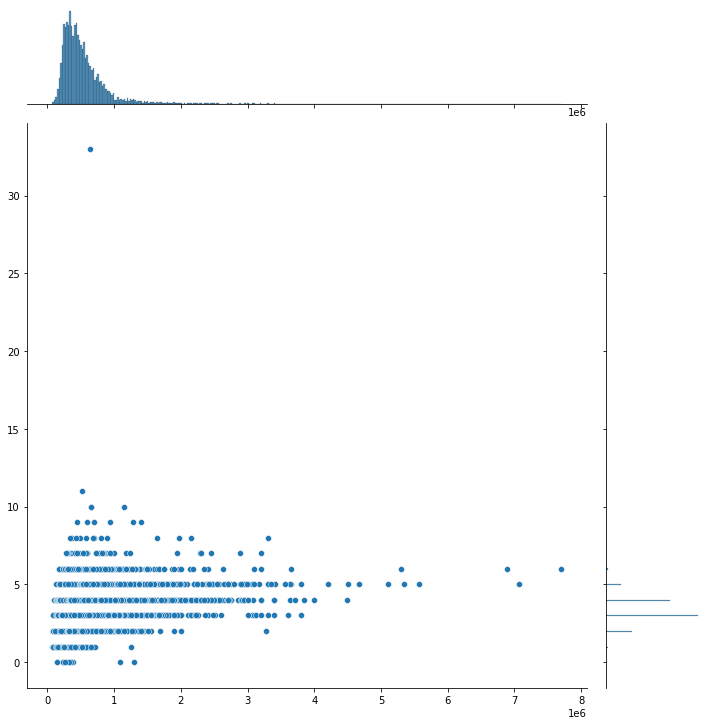

In [43]:
plt.figure(figsize=(10,10))
sns.jointplot(x=clear_data.price.values, y=clear_data.bedrooms.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
plt1 = plt()
sns.despine

Text(0.5, 1.0, 'Price vs Square Feet')

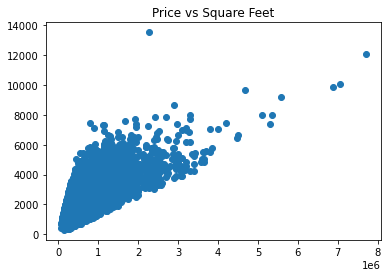

In [44]:
plt.scatter(clear_data.price,clear_data.sqft_living)
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs Location of the area')

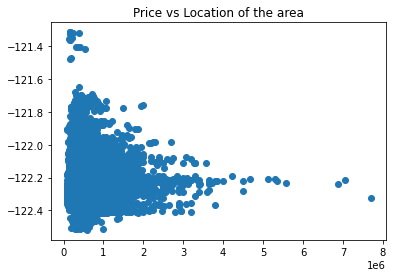

In [45]:
plt.scatter(clear_data.price,clear_data.long)
plt.title("Price vs Location of the area")

Text(0.5, 1.0, 'sqft_living vs Price')

C:\Users\sony\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sony\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


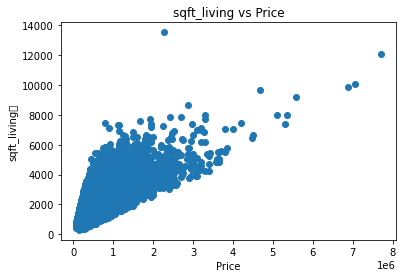

In [46]:
plt.scatter(clear_data.price,clear_data.sqft_living	)
plt.xlabel("Price")
plt.ylabel('sqft_living	')
plt.title("sqft_living vs Price")

<ipython-input-50-be907157ab03>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

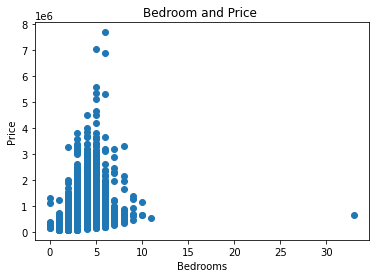

In [50]:
plt.scatter(clear_data.bedrooms,clear_data.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

In [49]:
!pip install seaborn